<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/M3B_Py_ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

This dataset seems suitable for exploring potential relationships between these factors and the likelihood of a fraudulent claim. For example, you might investigate if younger males with larger engines who haven't made a claim recently are more likely to file fraudulent claims.

* **age:** The age of the insurance policyholder.
* **is_male:** A binary indicator of the policyholder's gender (1 for male, 0 for not male).
* **engine_size:**  The size of the engine in the insured vehicle (the units are not specified but could be cubic centimeters or liters).
* **months_last_claim:** The number of months since the policyholder's last claim.
* **fraud:** A binary indicator of whether the claim was fraudulent (1 for fraudulent, 0 for not fraudulent).



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/car_insurance_fraud.csv')
df.head()

,age,is_male,engine_size,months_last_claim,fraud
0,71,0,120,24,1
1,40,0,70,12,1
2,78,0,200,12,0
3,31,1,120,6,1
4,32,1,120,12,0


SVMs are sensitive to feature scaling because they aim to maximize the margin between data points, and features with larger scales can disproportionately influence this margin calculation, leading to suboptimal decision boundaries.

Let's use MinMaxScaler to calculates the min/max of each column and scales the data. The result is converted back to a DataFrame (df_scaled) with the original column names.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled, columns = df.columns)
df_scaled

,age,is_male,engine_size,months_last_claim,fraud
0,0.743243,0.0,0.384615,1.000000,1.0
1,0.324324,0.0,0.000000,0.333333,1.0
2,0.837838,0.0,1.000000,0.333333,0.0
3,0.202703,1.0,0.384615,0.000000,1.0
4,0.216216,1.0,0.384615,0.333333,0.0
...,...,...,...,...,...
95,0.743243,1.0,1.000000,1.000000,1.0
96,0.905405,0.0,0.000000,1.000000,0.0
97,0.540541,1.0,1.000000,0.000000,0.0
98,0.067568,0.0,0.384615,0.333333,1.0


A train-test split is a crucial technique in machine learning used to evaluate a model's performance on unseen data. The dataset is divided into two subsets: a training set for model training and a testing set for evaluation. This prevents overfitting, where the model becomes too specialized to the training data. By using a separate testing set, we obtain a more realistic assessment of the model's generalization ability. It's essential to ensure a random split, consider data distribution, and potentially use stratified sampling for imbalanced datasets. To further enhance reliability, multiple train-test splits can be performed, and the average performance can be calculate


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['age','is_male','engine_size','months_last_claim']],df_scaled['fraud'] ,test_size=0.20)
X_train.head(3)

,age,is_male,engine_size,months_last_claim
85,0.135135,1.0,0.0,0.333333
92,0.716216,1.0,0.0,0.333333
30,0.054054,1.0,1.0,1.000000


A Support Vector Machine (SVM) is a robust supervised machine learning algorithm used for both classification and regression tasks. It works by finding the optimal boundary, known as a hyperplane, that separates different classes in the data. The data points closest to this hyperplane are called support vectors, and they play a crucial role in defining the hyperplane's position and orientation. SVM aims to maximize the margin, which is the distance between the hyperplane and the support vectors, as a larger margin typically leads to better generalization to unseen data. For cases where the data is not linearly separable, SVM employs a technique called the kernel trick to transform the data into a higher dimension where a hyperplane can effectively separate the classes. Due to its effectiveness in high-dimensional spaces, SVM is widely used in various applications, including image recognition, text classification, and bioinformatics.

![](https://miro.medium.com/v2/resize:fit:1200/1*fYXRn8T4u-BTGxFelpC2yg.gif)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
train_accuracy= svc.score(X_train,y_train)*100
train_accuracy

66.25

`preds = svc.predict(X_test)` uses a trained Support Vector Classifier (svc) to predict the class labels for the test data (X_test). The predictions are stored in the variable preds.

In [ ]:
preds = svc.predict(X_test)
preds

array([1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0.])

 We can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test,preds)*100
test_accuracy

55.00000000000001

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows how many times the model correctly predicted each class and how many times it made incorrect predictions.

[[8 4]
 [5 3]]


<Axes: >

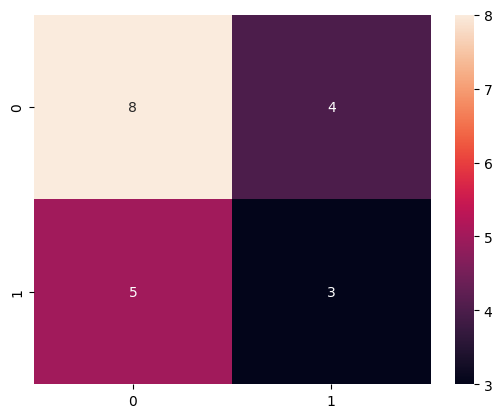

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

Precision and recall are two important metrics used to evaluate the performance of a classification model. They are particularly useful when dealing with imbalanced datasets.

- Precision measures the proportion of positive identifications that were actually correct. In other words, it tells us how accurate the positive predictions are.

- Recall measures the proportion of actual positive cases that were correctly identified. It tells us how well the model finds all the relevant cases.



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.62      0.67      0.64        12
         1.0       0.43      0.38      0.40         8

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.54      0.55      0.54        20



# Activity: SVM

Build a machine learning model to predict insurance claims. Explore and clean the dataset, handle missing values and outliers. Prepare the data by encoding categorical features and splitting it into training and testing sets. Choose a suitable classification algorithm (**Logistic Regression**) and train it on the training data. Evaluate the model's performance on the testing data using metrics like accuracy, precision, and recall. Submit a report summarizing your approach, data preprocessing, model selection, evaluation, and insights, along with the trained model and code.  

data: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/auto%20-%20class.csv`



***Dataset***: This dataset could be used to build a machine learning model to predict the likelihood of a claim being filed based on various factors like age, vehicle age, and previous insurance history.


* **is_male:** Binary variable indicating whether the policyholder is male (1) or female (0).
* **Age:** Age of the policyholder.
* **Driving_License:** Binary variable indicating whether the policyholder has a driving license (1) or not (0).
* **Region_Code:** Numerical code representing the geographic region.
* **Previously_Insured:** Binary variable indicating whether the policyholder had previous insurance (1) or not (0).
* **Vehicle_Age:** Age of the vehicle.
* **Vehicle_Damage:** Binary variable indicating whether the vehicle has previously been damaged (1) or not (0).
* **Policy_Sales_Channel:** Numerical code representing the sales channel through which the policy was purchased.
* **Vintage:** Duration of the policy in days.
* **Annual_Premium:** Annual premium amount.
* **claim:** Binary variable indicating whether a claim was filed (1) or not (0).



# Challenge: SVM Classifier

Build a machine learning model to predict insurance claims. Explore and clean the dataset, handle missing values and outliers. Prepare the data by encoding categorical features and splitting it into training and testing sets. Choose a suitable classification algorithm (**SVM Classifier**) and train it on the training data. Evaluate the model's performance on the testing data using metrics like accuracy, precision, and recall. Submit a report summarizing your approach, data preprocessing, model selection, evaluation, and insights, along with the trained model and code.  

data: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/fraud%20-%20auto.csv`

This dataset seems suitable for exploring potential relationships between these factors and the likelihood of a fraudulent claim. For example, you might investigate if younger males with larger engines who haven't made a claim recently are more likely to file fraudulent claims.

* **Month:** The month in which the accident occurred.
* **WeekOfMonth:** The week of the month in which the accident occurred.
* **DayOfWeek:** The day of the week on which the accident occurred.
* **Make:** The make of the vehicle involved in the accident.
* **AccidentArea:** The area in which the accident occurred (e.g., urban or rural).
* **DayOfWeekClaimed:** The day of the week on which the claim was made.
* **MonthClaimed:** The month in which the claim was made.
* **WeekOfMonthClaimed:** The week of the month in which the claim was made.
* **Sex:** The gender of the policyholder.
* **MaritalStatus:** The marital status of the policyholder.
* **Age:** The age of the policyholder.
* **Fault:** Whether the policyholder was at fault for the accident.
* **PolicyType:** The type of insurance policy.
* **VehicleCategory:** The category of the vehicle.
* **VehiclePrice:** The price range of the vehicle.
* **PolicyNumber:** The unique identifier for the insurance policy.
* **RepNumber:** The representative number.
* **Deductible:** The deductible amount on the insurance policy.
* **DriverRating:** The driver's rating.
* **Days_Policy_Accident:** The number of days between the start of the policy and the accident.
* **Days_Policy_Claim:** The number of days between the start of the policy and the claim.
* **PastNumberOfClaims:** The number of past claims made by the policyholder.
* **AgeOfVehicle:** The age of the vehicle.
* **AgeOfPolicyHolder:** The age range of the policyholder.
* **PoliceReportFiled:** Whether a police report was filed for the accident.
* **WitnessPresent:** Whether there were any witnesses present at the accident.
* **AgentType:** The type of agent who handled the claim.
* **NumberOfSuppliments:** The number of supplements.
* **AddressChange_Claim:** Whether the policyholder changed their address before the claim.
* **NumberOfCars:** The number of cars covered by the insurance policy.
* **Year:** The year in which the accident occurred.
* **BasePolicy:** The base insurance policy type.
* **FraudFound_P:** Whether fraud was found in the claim.

